In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE

from umap import UMAP

# Load data

In [2]:
train = pd.read_csv('train.csv', index_col='id')
original = pd.read_csv('original.csv')
test = pd.read_csv('test.csv', index_col='id')

# Brief EDA

In [3]:
original.shape

(252, 65)

In [4]:
train.shape

(707, 65)

In [5]:
test.shape

(303, 64)

In [6]:
train.describe()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,0.503536,0.449788,0.459689,0.487977,0.517680,0.449788,0.441301,0.487977,0.390382,0.393211,...,0.148515,0.072136,0.097595,0.079208,0.084866,0.154173,0.144272,0.137199,0.032532,0.031117
std,0.500341,0.497825,0.498725,0.500209,0.500041,0.497825,0.496894,0.500209,0.488181,0.488809,...,0.355861,0.258896,0.296977,0.270254,0.278879,0.361370,0.351614,0.344301,0.177533,0.173758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


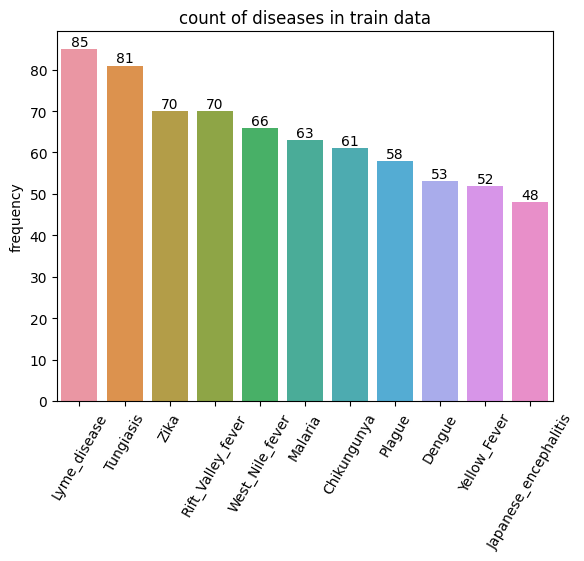

In [8]:
ax = sns.barplot(x=train.prognosis.unique(), y=train.prognosis.value_counts())
ax.bar_label(ax.containers[0])
plt.xticks(rotation=60)
plt.ylabel('frequency')
plt.title('count of diseases in train data')
plt.show()

# Combine Train with Original

In [9]:
original.prognosis = original.prognosis.str.replace(' ', '_')
train_final = pd.concat([train, original]).reset_index(drop=True)

In [10]:
train_final.shape

(959, 65)

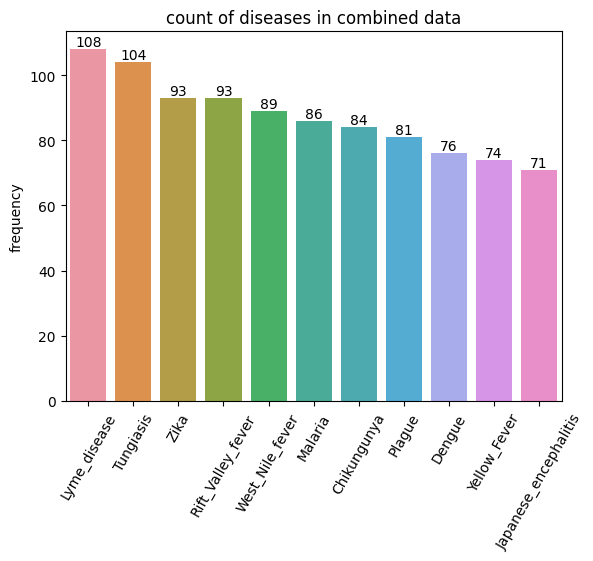

In [11]:
ax = sns.barplot(x=train_final.prognosis.unique(), y=train_final.prognosis.value_counts())
ax.bar_label(ax.containers[0])
plt.xticks(rotation=60)
plt.ylabel('frequency')
plt.title('count of diseases in combined data')
plt.show()

# Split Features And Target

In [12]:
X = train_final.drop('prognosis', axis=1)
y = train_final.prognosis

# Feature Engineering

In [13]:
# n_components = 5
# pca_column_names = [f"PCA{i+1}" for i in range(n_components)]
# pca = PCA(n_components=n_components)
# pca_features = pd.DataFrame(pca.fit_transform(X), columns=pca_column_names)
# X = pd.concat([X, pca_features], axis=1).reset_index(drop=True)

# Target transformation

In [14]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Base Model

In [15]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if not actual:
        return 0.0

    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        # first condition checks whether it is valid prediction
        # second condition checks if prediction is not repeated
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [16]:
rf = RandomForestClassifier(random_state=0)

results = []

rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

for i, (train_index, test_index) in enumerate(rskf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_test)
    
    sorted_pred_idx = np.argsort(-y_pred, axis=1)[:,:3]
    original_shape = sorted_pred_idx.shape
    top3_pred = encoder.inverse_transform(sorted_pred_idx.reshape(-1,1).ravel())
    top3_pred = top3_pred.reshape(original_shape)
    results.append(mapk(y_test.reshape(-1, 1), sorted_pred_idx, k=3))
    
print(f'MAPK score: {np.mean(results)}')

MAPK score: 0.46174488304093564


# Prediction

In [ ]:
accuracy(y_prediction, y_test)

In [17]:
# test_pca_features = pd.DataFrame(pca.transform(test), columns=pca_column_names)
# test_final = pd.concat([test.reset_index(drop=True), test_pca_features], axis=1).reset_index(drop=True)

In [18]:
y_pred = rf.predict_proba(test)
    
sorted_pred_idx = np.argsort(-y_pred, axis=1)[:,:3]
original_shape = sorted_pred_idx.shape
top3_pred = encoder.inverse_transform(sorted_pred_idx.reshape(-1,1).ravel())
top3_pred = top3_pred.reshape(original_shape)

# Submission

In [19]:
submission = pd.read_csv('sample_submission.csv')
submission['prognosis'] = np.apply_along_axis(lambda x: np.array(' '.join(x), dtype="object"), 1, top3_pred)
submission.to_csv('submission_base_model_with_original_and_pca.csv', columns=['id', 'prognosis'], index=False)